##  Risk assessment of borrowers based on predictive model 

After training a LightGBM model to predict the probability of serious delinquency within the next two years, I aim to explore and interpret these predicted risk scores using Exploratory Data Analysis.

###  Objective

The goal is to categorize individuals into **three credit risk levels** based on their predicted probability of default:
- **Low Risk**: Probability < 5%
- **Medium Risk**: Probability between 5% and 10%
- **High Risk**: Probability > 10%

By assigning these categories, I can:
- Understand how risk is distributed across the test population,
- Identify demographic and financial characteristics of each risk group,
- Inform data-driven credit decision strategies.

###  Key Questions

- What is the overall distribution of borrowers across low, medium, and high risk levels?
- Are younger individuals more likely to fall into high-risk categories?
- What variables are important to assess the risk?
- Which age groups show the highest concentration of high-risk individuals?

###  EDA Roadmap

I will:
1. Assign risk levels based on predicted probabilities,
2. Visualize the distribution of risk levels,
3. Analyze how **age**  relates to risk,
4. Create age group bins (e.g., 18–24, 25–34) to assess how risk varies across life stages.

This EDA helps translate abstract model outputs into actionable business insights, enabling better understanding of who is at risk — and why.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
df_train = pd.read_csv("/Users/amastikbayev/Downloads/cs-training.csv")
df_test = pd.read_csv("/Users/amastikbayev/Downloads/cs-test.csv")

In [12]:
df_train.shape

(150000, 12)

In [14]:
df_test.shape

(101503, 12)

In [16]:
df_train.head(3)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


In [21]:
df_test.head(3)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0


In [27]:
df_train.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [33]:
df_train.dropna(subset=['NumberOfDependents'],inplace=True)
df_train.dropna(subset=['MonthlyIncome'],inplace=True)

### Since we have quite large dataset I decided to drop all the rows that contain missing values

In [35]:
df_train.shape

(120269, 12)

In [41]:
df_test.isna().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [43]:
df_test.dropna(subset=['NumberOfDependents'],inplace=True)
df_test.dropna(subset=['MonthlyIncome'],inplace=True)

In [45]:
df_test.shape

(81400, 12)

In [67]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.7 MB/s eta 0:00:0000:0100:01


In [69]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, auc, roc_curve

In [61]:
X = df_train.drop(columns={'Unnamed: 0', 'SeriousDlqin2yrs'})
y = df_train['SeriousDlqin2yrs']

In [63]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [71]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 6686, number of negative: 89529
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 971
[LightGBM] [Info] Number of data points in the train set: 96215, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.069490 -> initscore=-2.594547
[LightGBM] [Info] Start training from score -2.594547


LGBMClassifier(random_state=42)

In [73]:
y_val_pred_proba_lgbm = lgbm_model.predict_proba(X_val)[:, 1]
lgbm_auc = roc_auc_score(y_val, y_val_pred_proba_lgbm)

print(f"LGBM Validation ROC AUC: {lgbm_auc:.4f}")

LGBM Validation ROC AUC: 0.8499


In [78]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_val_pred_proba_rf = rf_model.predict_proba(X_val)[:, 1]
rf_auc = roc_auc_score(y_val, y_val_pred_proba_rf)

print(f"Random Forest Validation ROC AUC: {rf_auc:.4f}")

Random Forest Validation ROC AUC: 0.8278


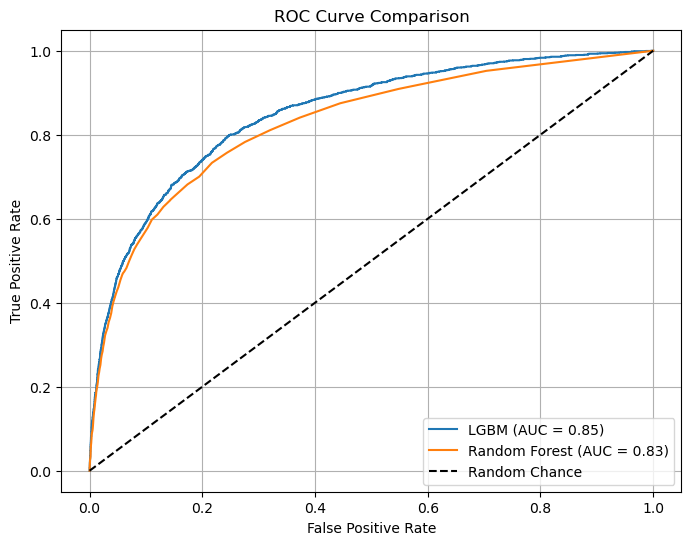

In [81]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_lgbm, tpr_lgbm, _ = roc_curve(y_val, y_val_pred_proba_lgbm)
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_val_pred_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm, tpr_lgbm, label=f"LGBM (AUC = {lgbm_auc:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

## LGBM model shows better result so I will continue with it

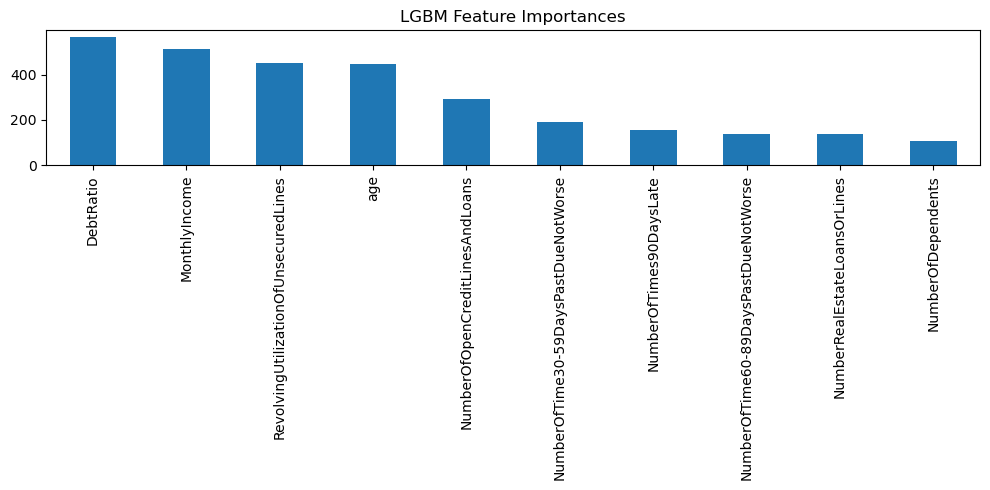

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(lgbm_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title="LGBM Feature Importances")
plt.tight_layout()
plt.show()

In [91]:
df_train.head(2)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


In [93]:
df_test.head(2)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0


In [97]:
X_test = df_test.drop(columns=['Unnamed: 0', 'SeriousDlqin2yrs'])
X_test = X_test[X_train.columns]  # ensure correct feature order

y_test_pred = lgbm_model.predict_proba(X_test)[:, 1]

submission = pd.DataFrame({
    'Id': df_test['Unnamed: 0'],
    'SeriousDlqin2yrs': y_test_pred
})
submission.to_csv('submission.csv', index=False)

submission.head(5)

,Id,SeriousDlqin2yrs
0,1,0.062598
1,2,0.043752
2,3,0.016667
3,4,0.065333
4,5,0.117877


For Id 1 there is a 6.26% chance that this person will default.

0.016667 for Id 3 so Only a 1.67% chance which is a very low risk.
0.117877 for Id 5 about 11.79% chance of default which might be a higher risk depending on the benchmark

In [103]:
import pandas as pd

# risk levels based on predicted probability
def assign_risk(prob):
    if prob < 0.05:
        return 'Low Risk'
    elif prob < 0.10:
        return 'Medium Risk'
    else:
        return 'High Risk'

df_test['Risk'] = y_test_pred  # Add predicted probabilities
df_test['RiskLevel'] = df_test['Risk'].apply(assign_risk)

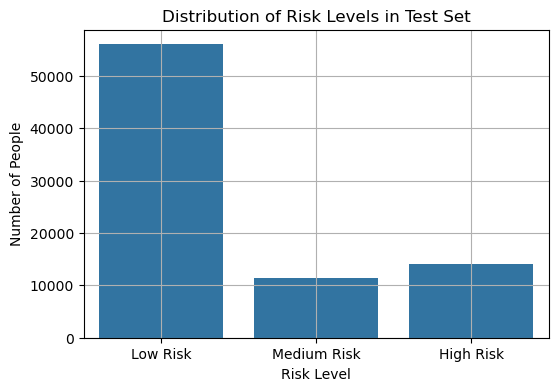

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df_test, x='RiskLevel', order=['Low Risk', 'Medium Risk', 'High Risk'])
plt.title('Distribution of Risk Levels in Test Set')
plt.xlabel('Risk Level')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()

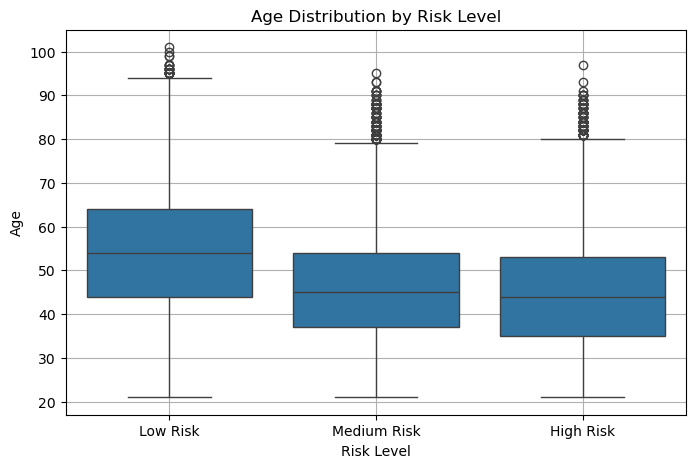

In [107]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_test, x='RiskLevel', y='age', order=['Low Risk', 'Medium Risk', 'High Risk'])
plt.title('Age Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Age')
plt.grid(True)
plt.show()

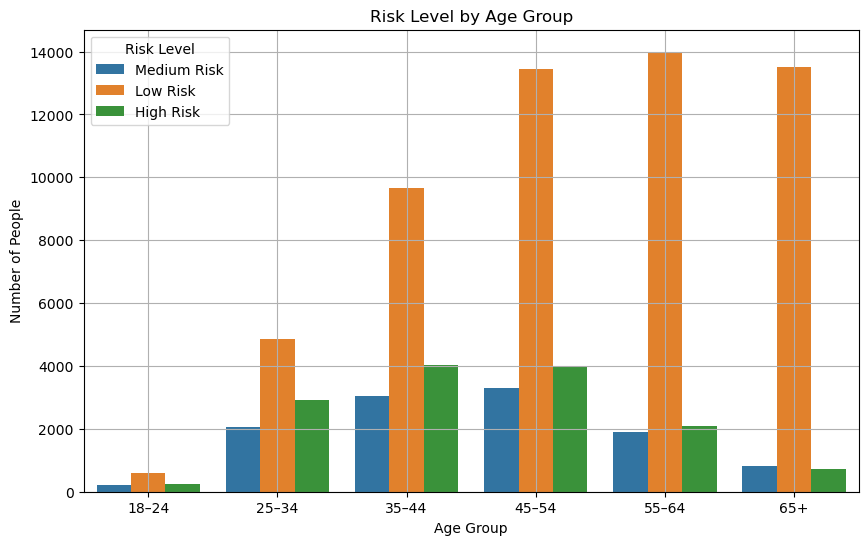

In [115]:
df_test['AgeGroup'] = pd.cut(df_test['age'], bins=[17, 24, 34, 44, 54, 64, 100], 
                              labels=['18–24', '25–34', '35–44', '45–54', '55–64', '65+'])

plt.figure(figsize=(10, 6))
sns.countplot(data=df_test, x='AgeGroup', hue='RiskLevel', order=['18–24', '25–34', '35–44', '45–54', '55–64', '65+'])
plt.title('Risk Level by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.legend(title='Risk Level')
plt.grid(True)
plt.show()